## Support Vector Machines

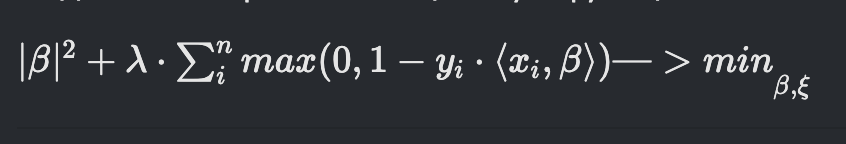
Hinge Loss

In [ ]:
from sklearn.svm import LinearSVC

pipe_svm = Pipeline([("scaler_svm", MinMaxScaler()),
                     ("SVM", LinearSVC())])
pipe_svm.fit(X_train, y_train)


In [ ]:
### чтобы построить и изобразить рок-кривую для SVM, придется
### в начале преобразовать выходы pipe_svm.decision_function


pipe_svm.decision_function(X_test.head(2))
def sigmoid(output):
    return 1 / (1 + np.exp(-output))

pred_prob = sigmoid(pipe_svm.decision_function(X_test))
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
from sklearn.metrics import auc

auc(fpr, tpr)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

CalibrationDisplay.from_predictions(y_test, pred_prob)

In [ ]:
### Калибровка

from sklearn.calibration import CalibratedClassifierCV

calibration = CalibratedClassifierCV(pipe_svm, cv=5, method='isotonic') # 'sigmoid'/'isotonic'
calibration.fit(X_train, y_train)

calibrated_probs = calibration.predict_proba(X_test)[:, 1]
CalibrationDisplay.from_predictions(y_test, calibrated_probs)

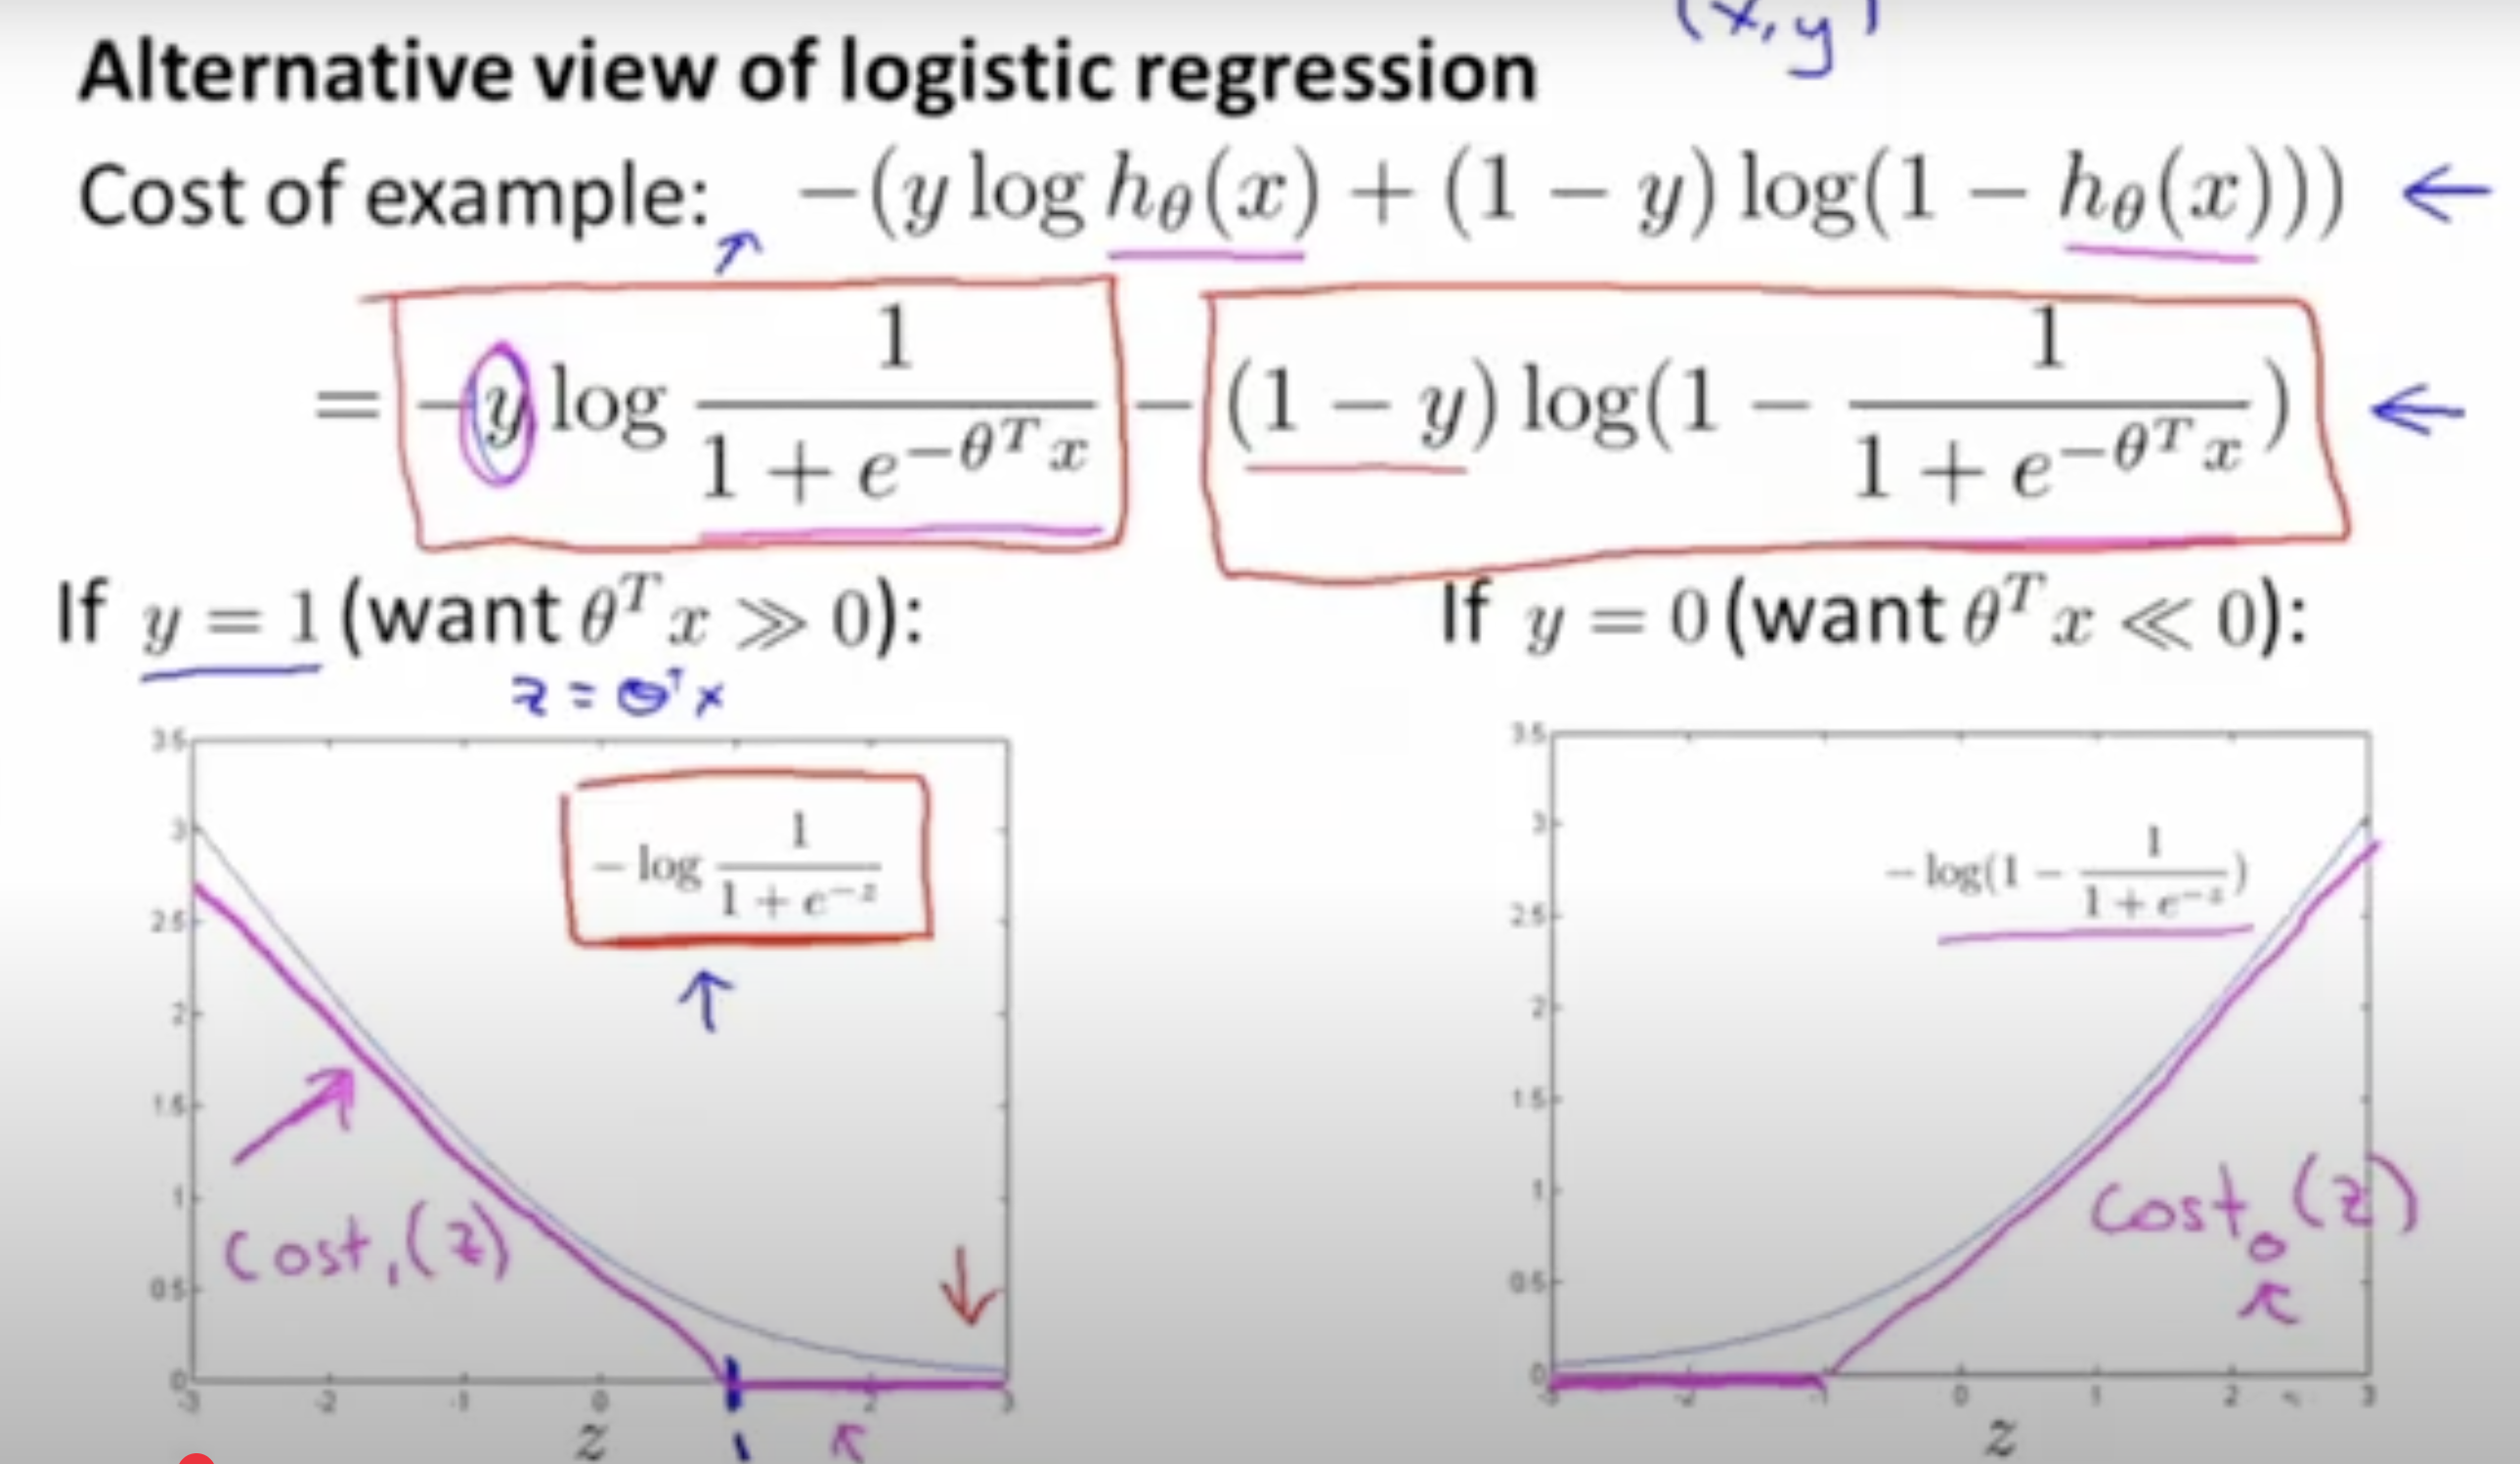
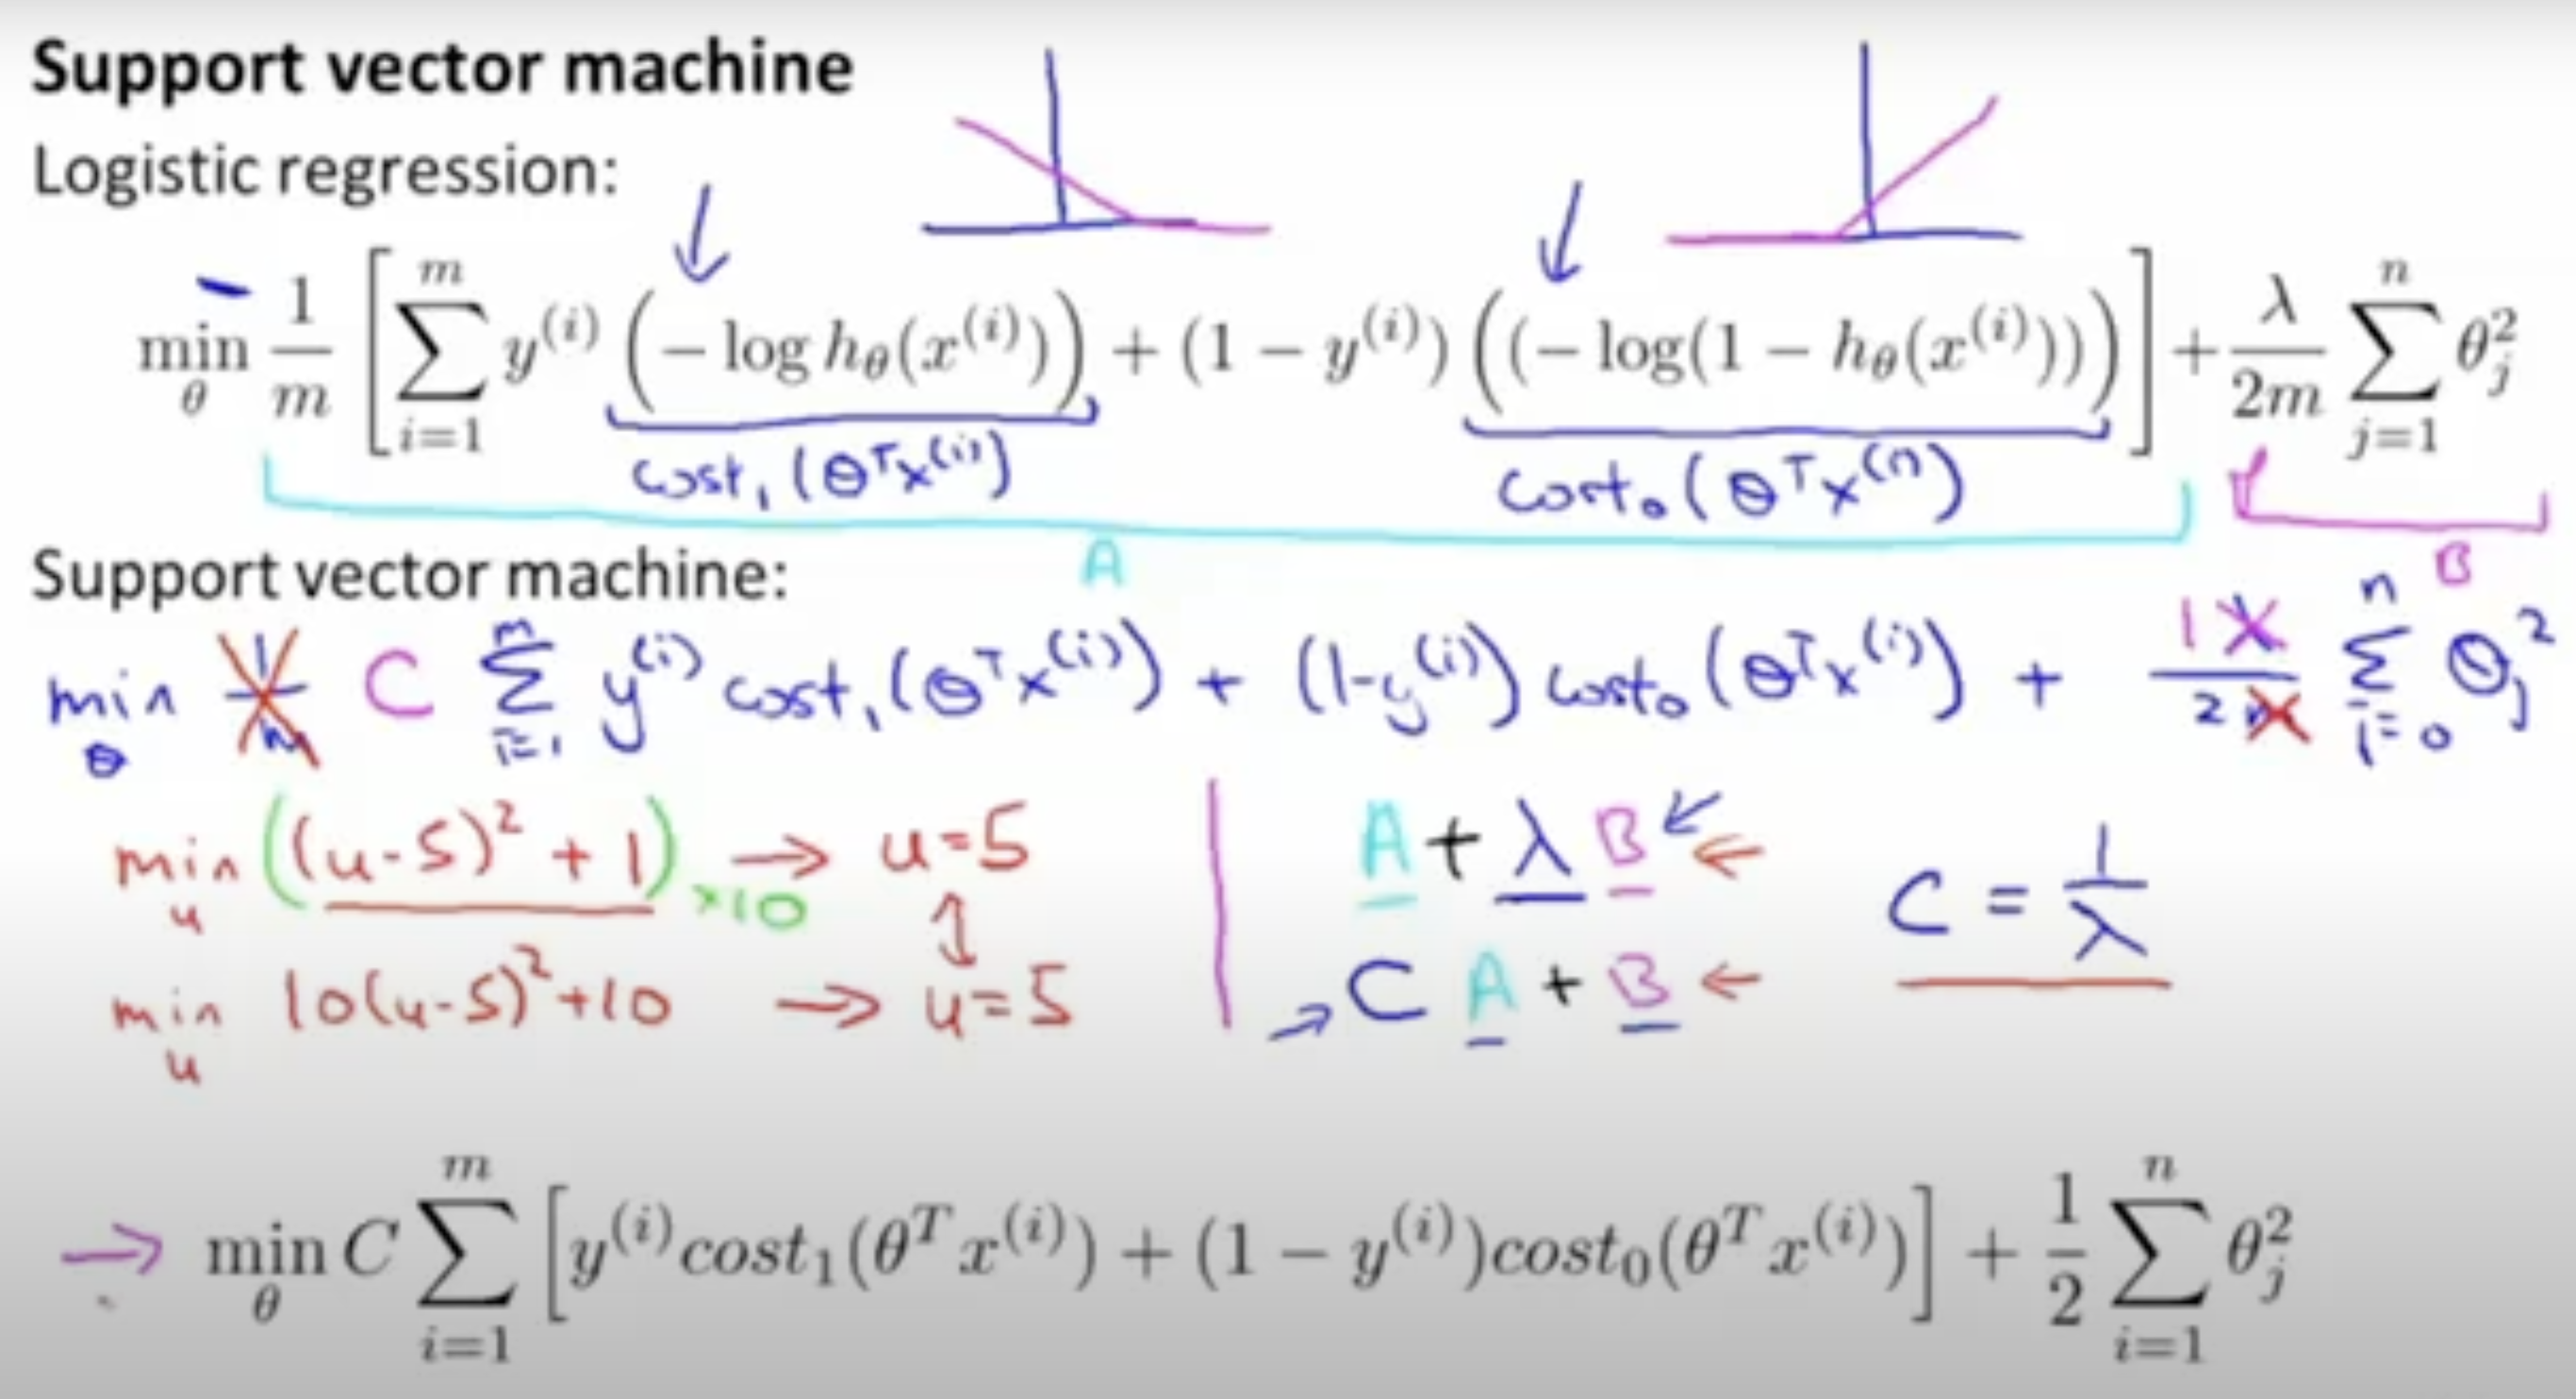
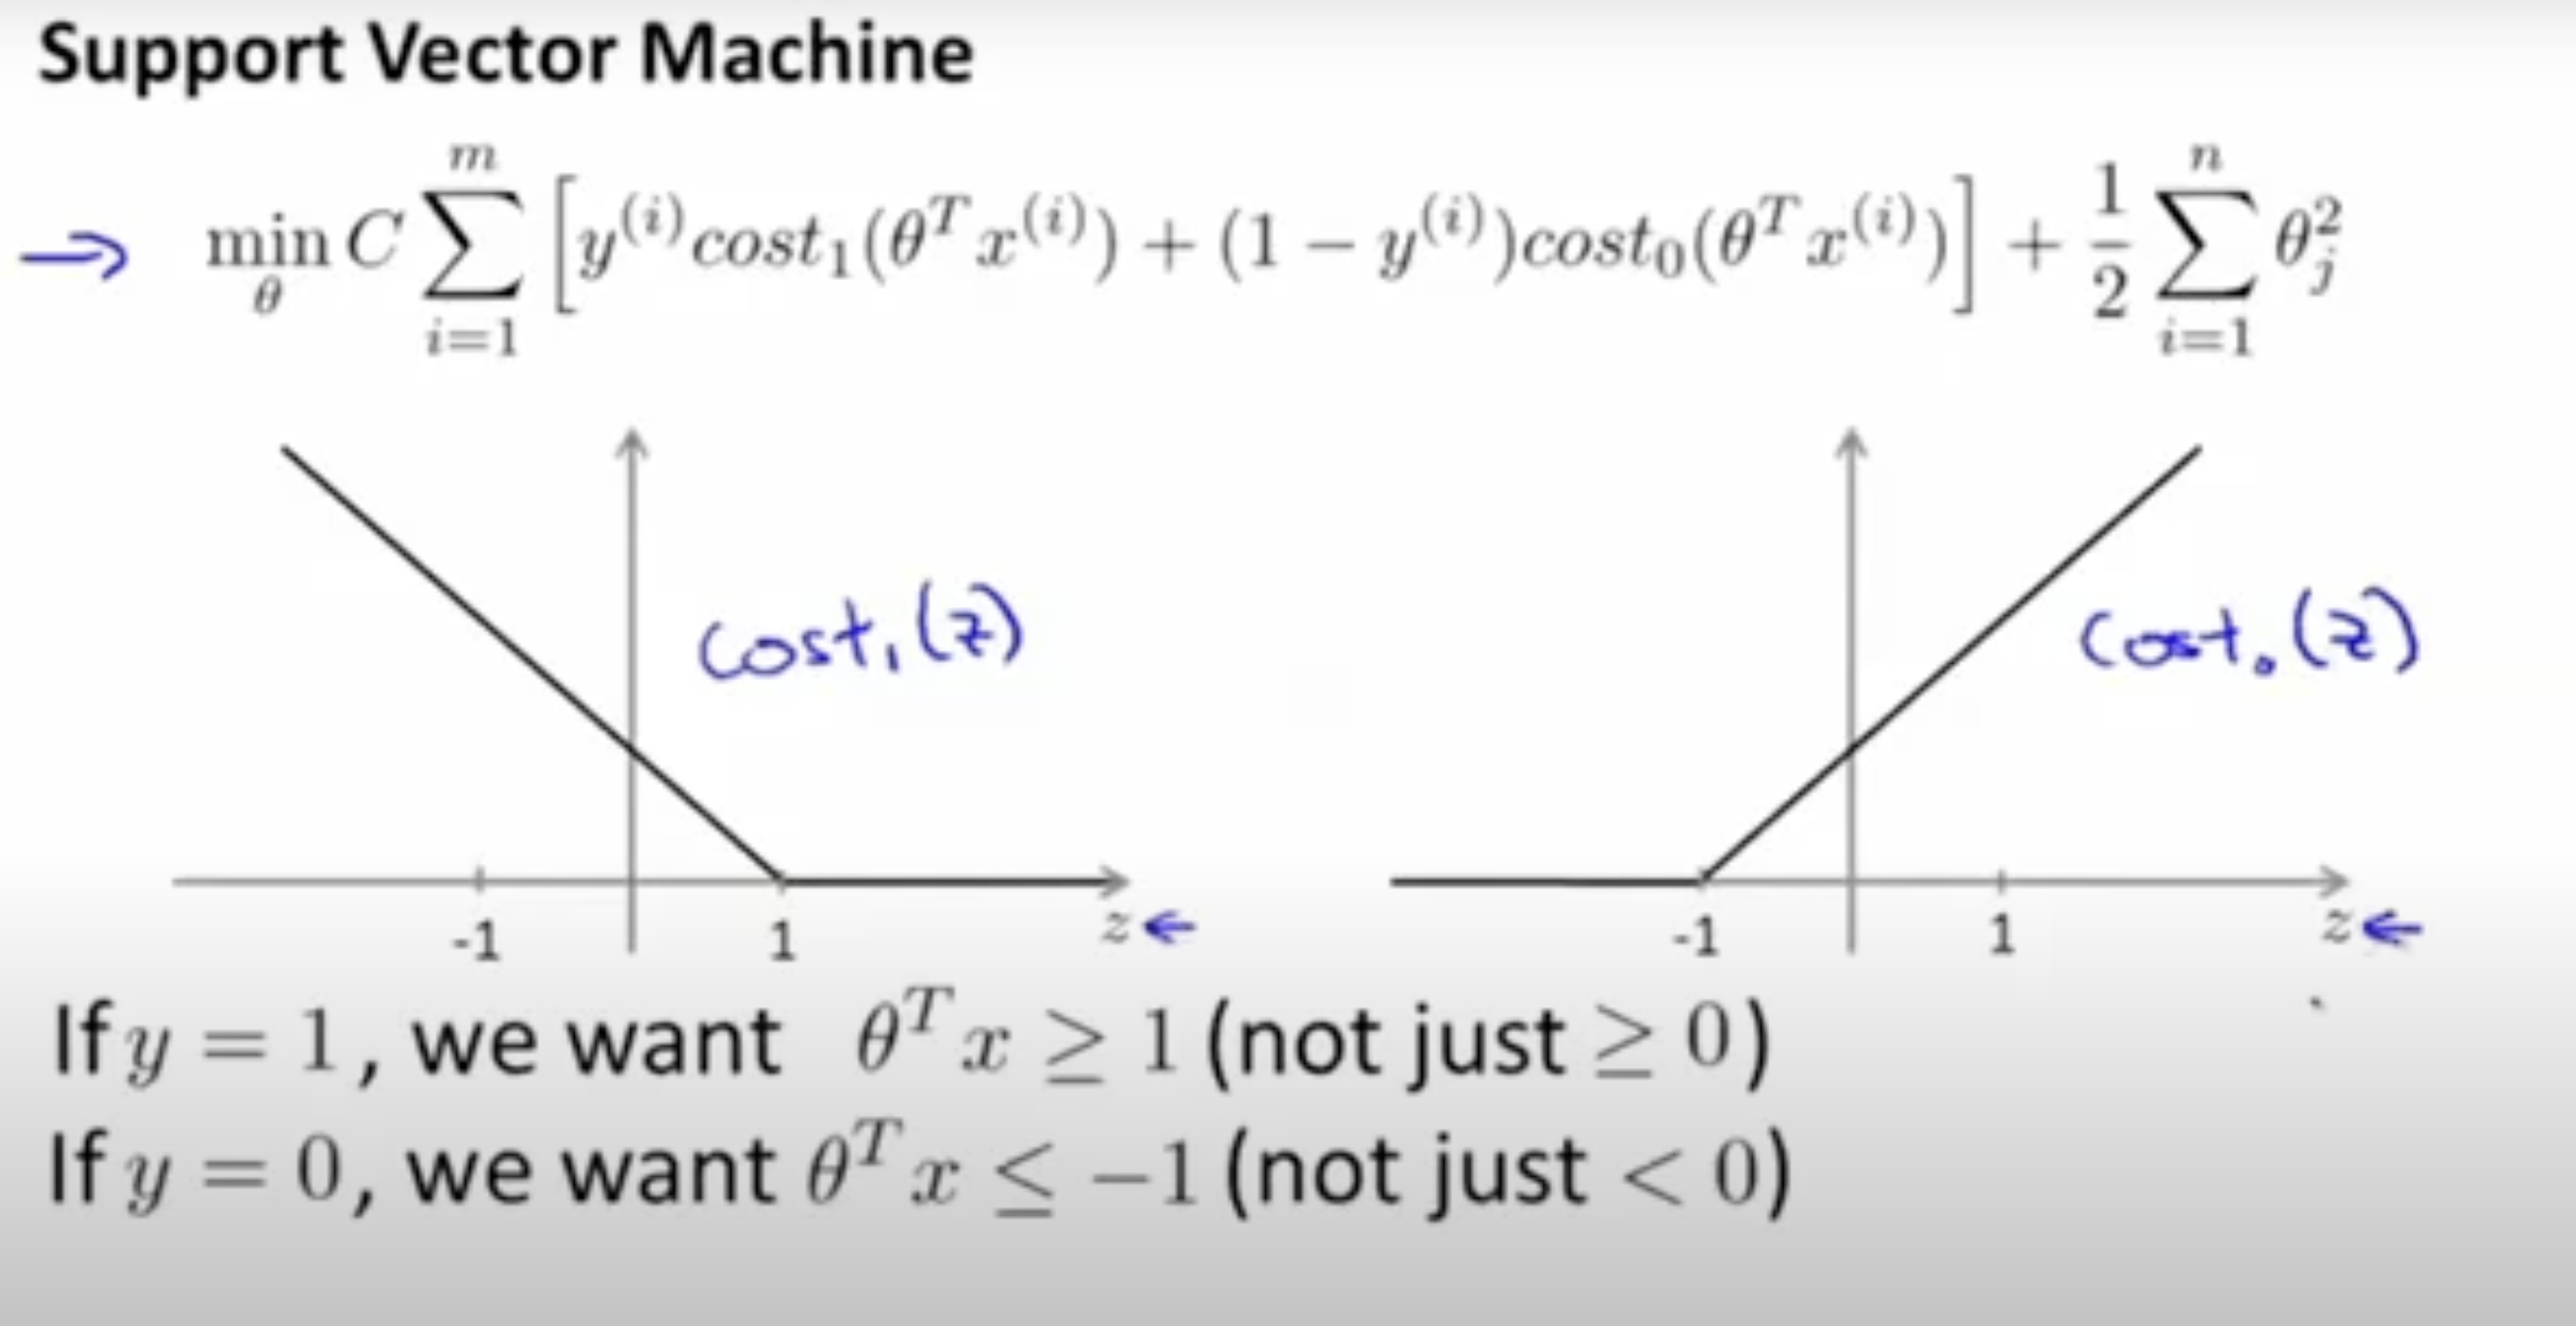
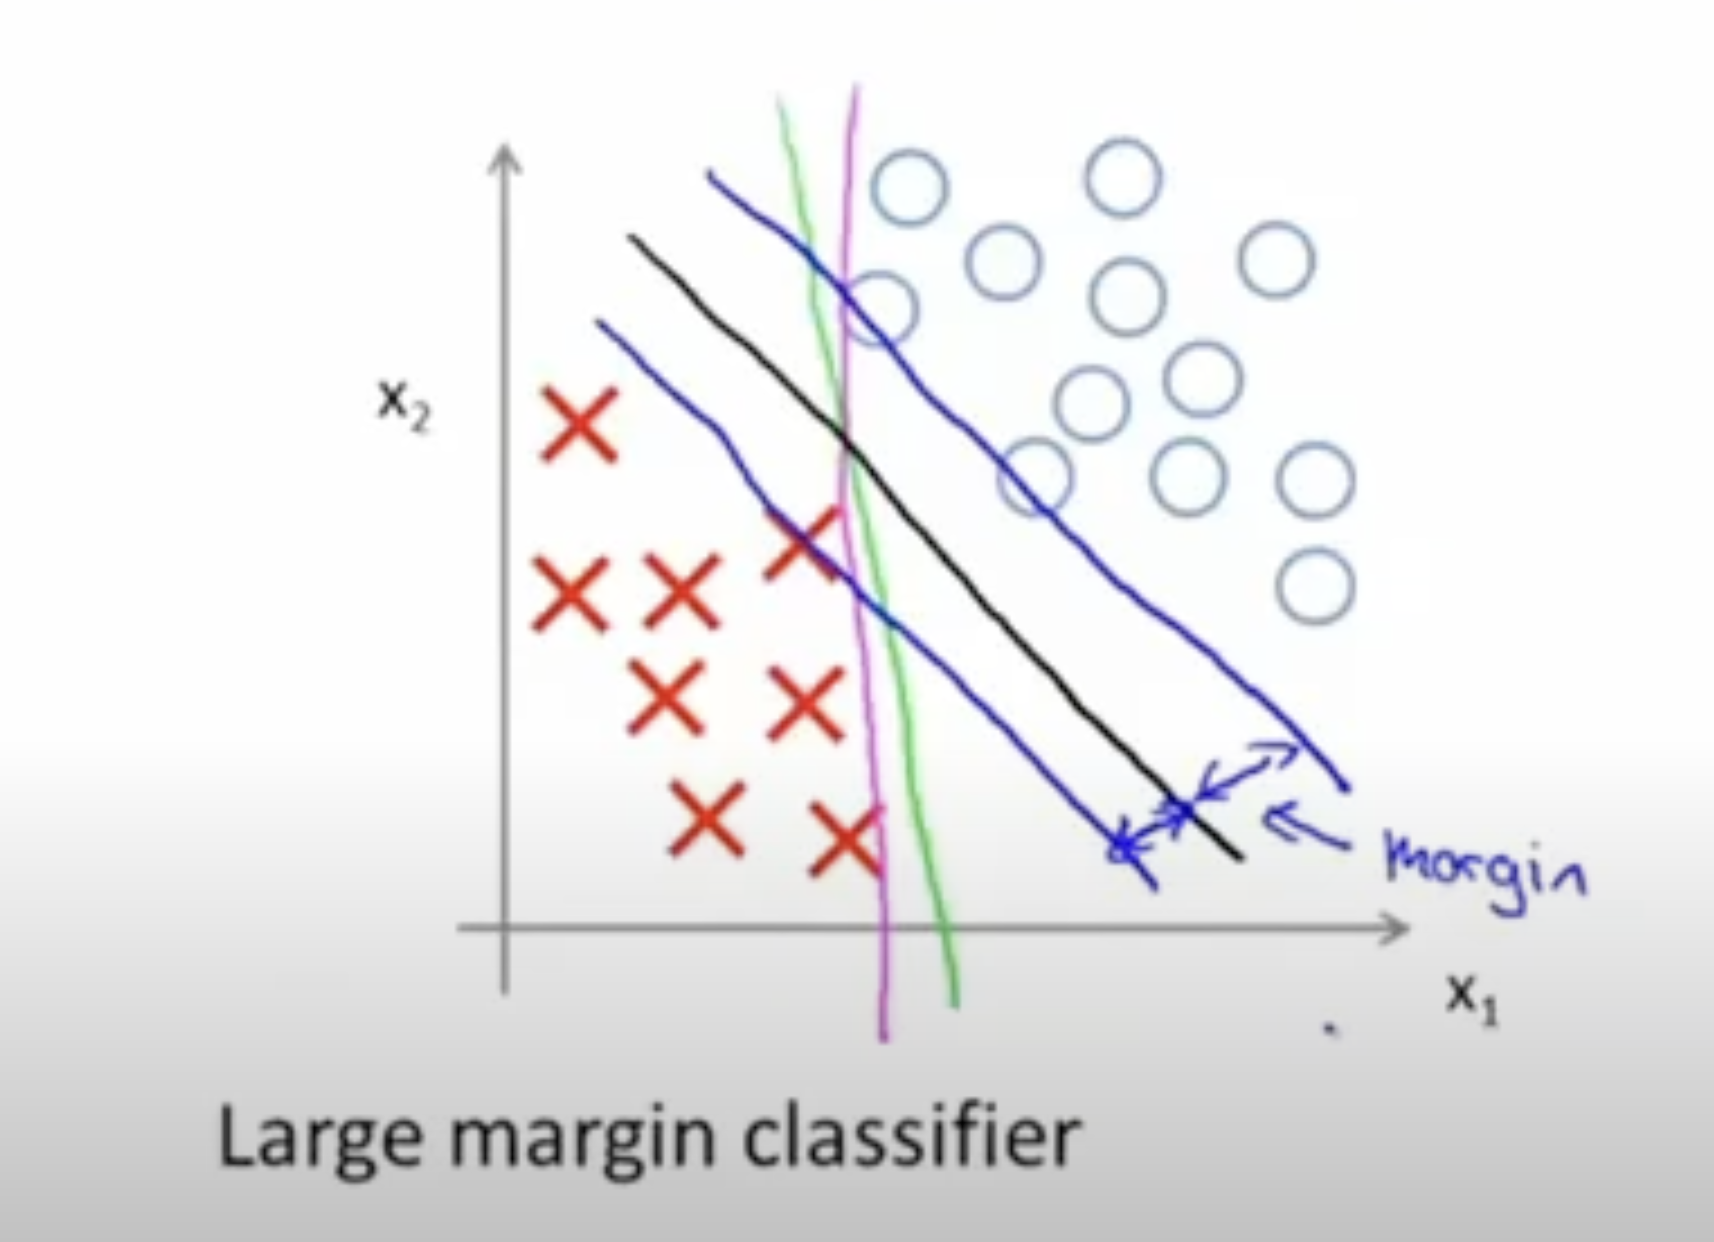

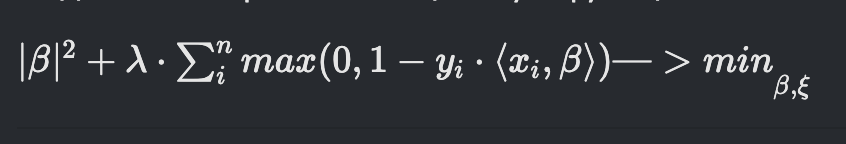
Hinge Loss

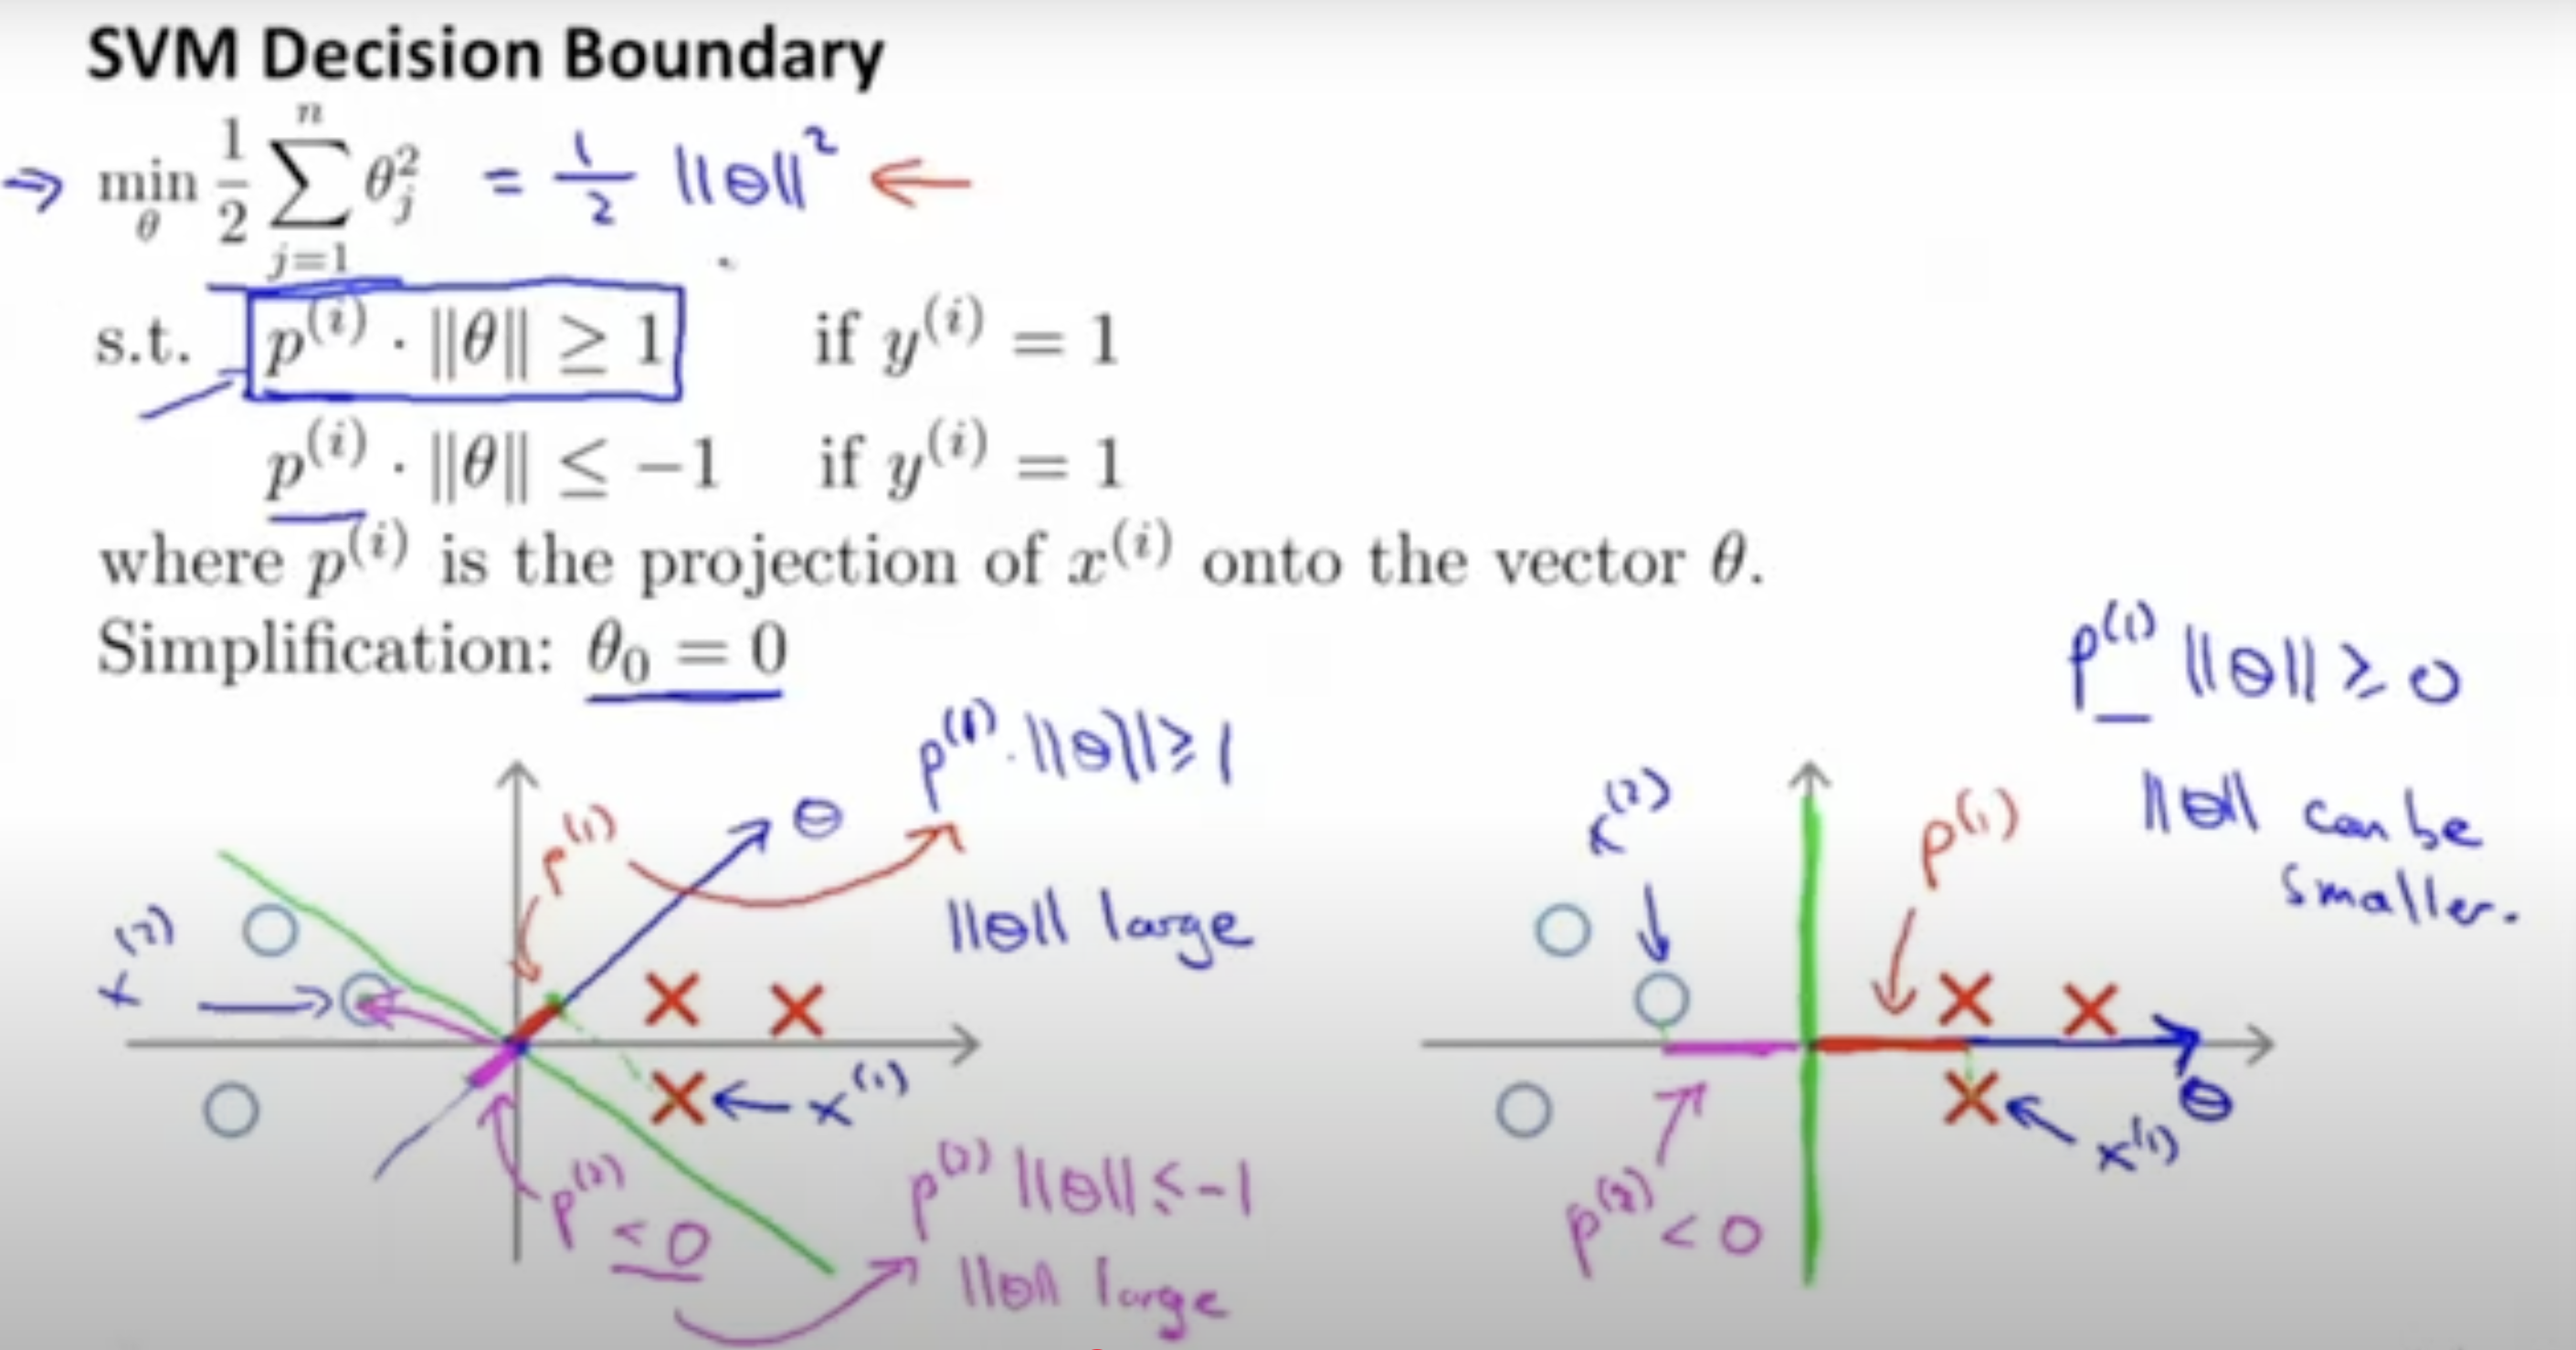